In [128]:
import json
from pathlib import Path
import numpy as np
import kaleido
import plotly.express as px
import plotly.graph_objects as go

In [129]:
f1 = '../scripts/cell_proportions.json'
f2 = '../scripts/cell_types.json'
with open(f1, 'r') as f:
    cell_proportions = json.load(f)

with open(f2, 'r') as f:
    cell_types = json.load(f)    

In [130]:
# cell_proportions
# cell_types
# list(cell_types.keys())

In [131]:
# By absolute counts
cell_type_per_dataset_matrix = []
for cell_type, total in cell_types.items():
    cell_type_per_dataset = []
    for dataset in cell_proportions:
        if cell_type in dataset['cell_types']:
            cell_type_per_dataset.append(dataset['cell_types'][cell_type])
        else:
            cell_type_per_dataset.append(0)
    cell_type_per_dataset_matrix.append(cell_type_per_dataset)

# Calculate fractional amounts
cell_type_per_dataset_matrix_by_fraction = []
for cell_type, total in cell_types.items():
    cell_type_per_dataset = []
    for dataset in cell_proportions:
        if cell_type in dataset['cell_types']:
            cell_type_per_dataset.append(dataset['cell_types'][cell_type] / total)
        else:
            cell_type_per_dataset.append(0)
    cell_type_per_dataset_matrix_by_fraction.append(cell_type_per_dataset)

In [132]:
# cell_type_per_dataset_matrix
# cell_type_per_dataset_matrix_by_fraction

In [133]:
x_labels = [Path(cp["file"]).stem for cp in cell_proportions]
data = cell_type_per_dataset_matrix
data_f = cell_type_per_dataset_matrix_by_fraction

In [134]:
# x_labels

/var/folders/_8/071zby353550wb33x3570w11900w7x/T/ipykernel_84987/3467100269.py:3: RuntimeWarning:

divide by zero encountered in log10



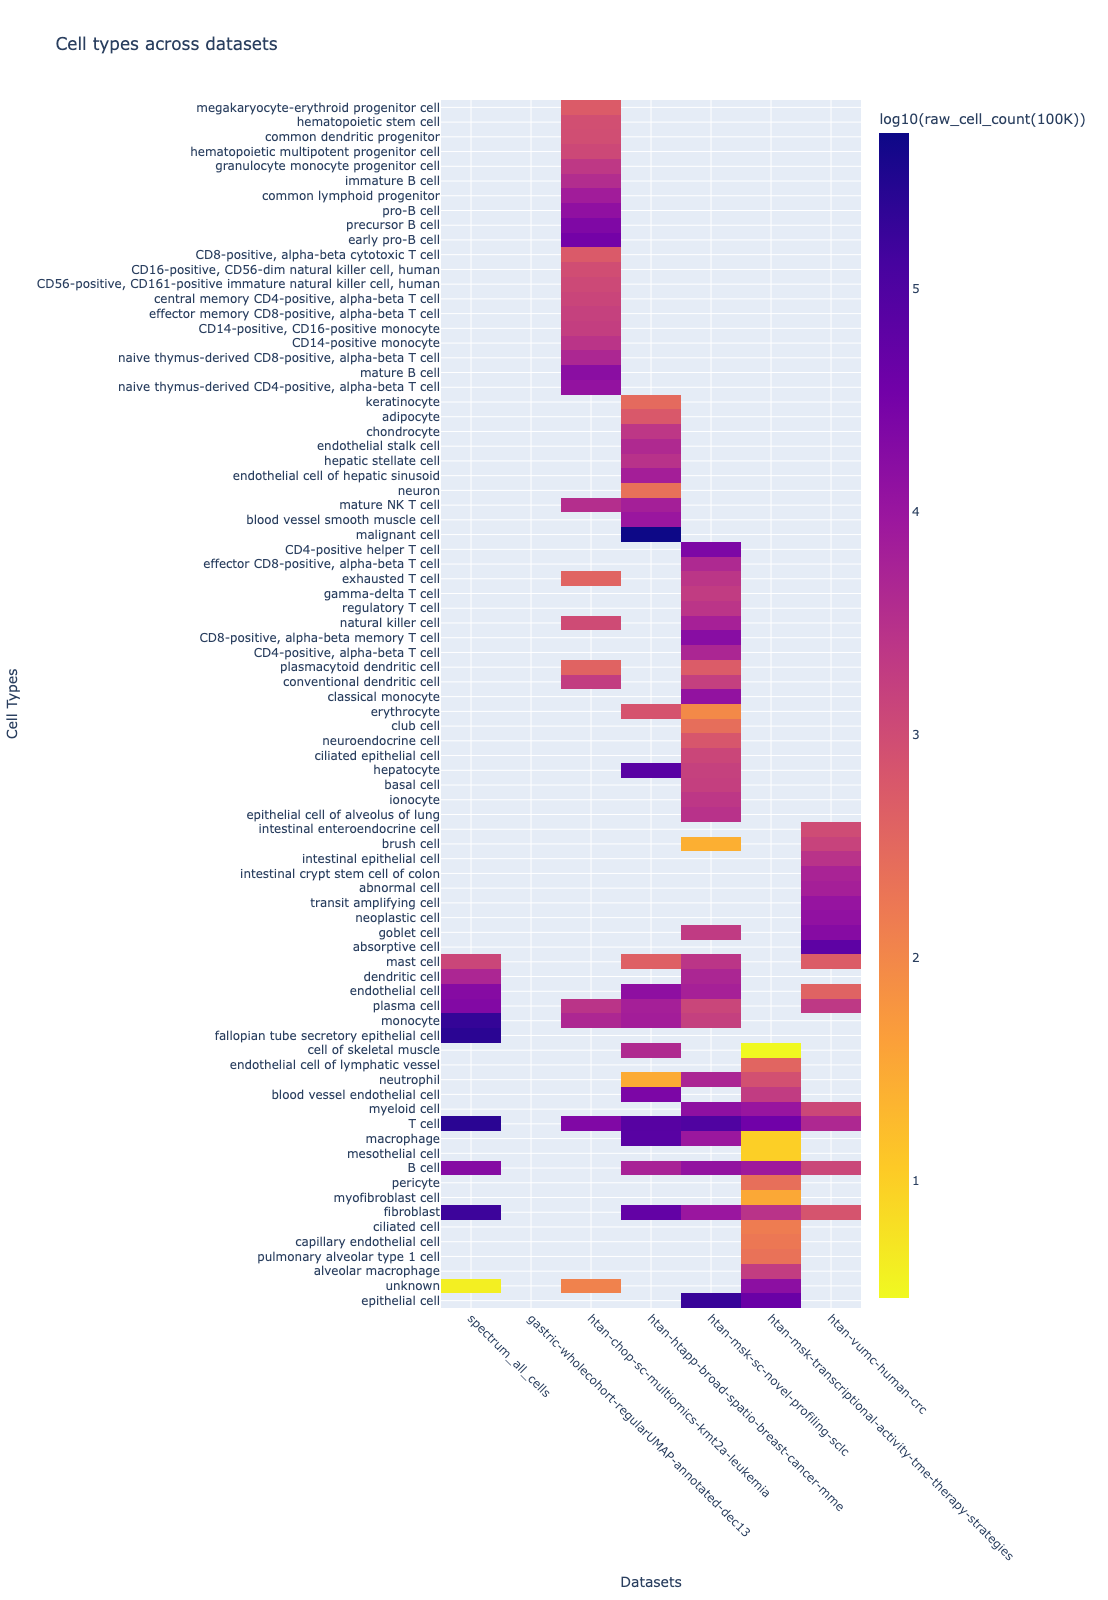

In [135]:
data_clipped = np.clip(data, 0.1, None)
fig = go.Figure(data=go.Heatmap(
    z=np.log10(data),
    x=x_labels,
    y=list(cell_types.keys()),
    colorbar=dict(
        title="log10(raw_cell_count(100K))",

    ),
    showscale=True,
    reversescale=True
))

fig.update_layout(title="Cell types across datasets",
                  width=900,
                  height=1600,
                  yaxis={"title": 'Cell Types'},
                  xaxis={"title": 'Datasets',"tickangle": 45},
                  yaxis_nticks=len(data))
fig.show()

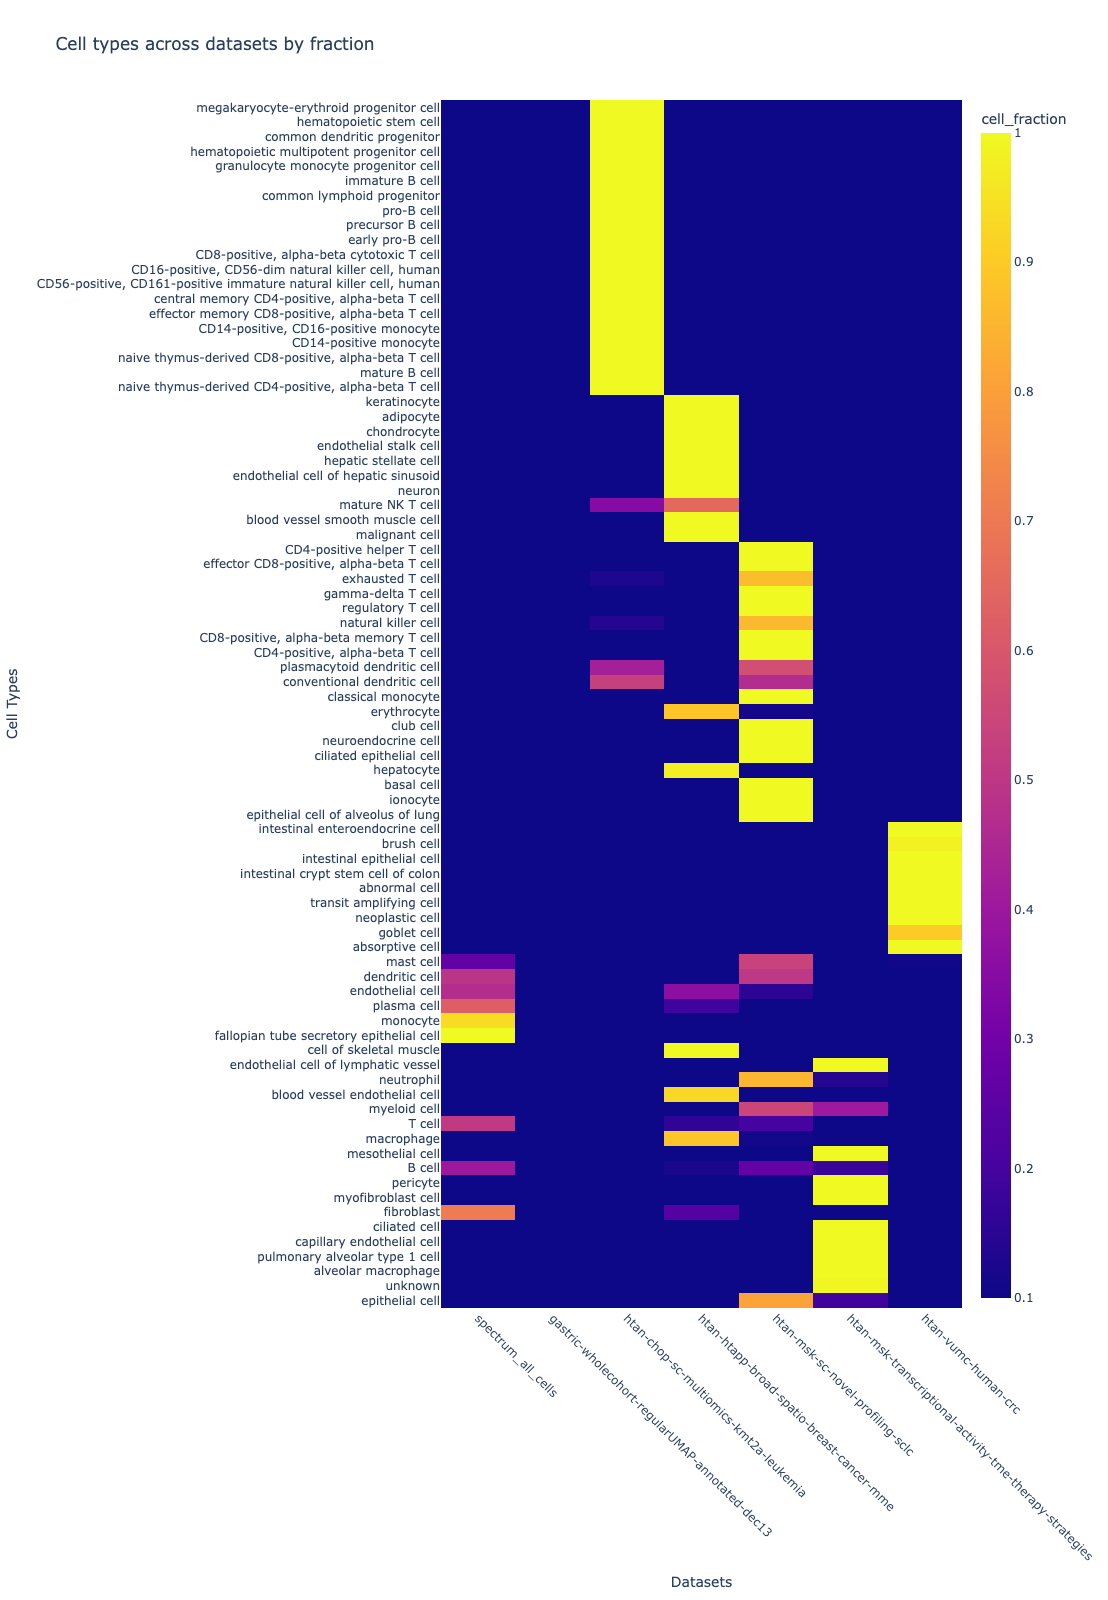

In [137]:
data_f_clipped = np.clip(data_f, 0.1, None)

fig = go.Figure(data=go.Heatmap(
    z=data_f_clipped,
    x=x_labels,
    y=list(cell_types.keys()),
    colorbar=dict(
        title="cell_fraction",

    ),
    showscale=True
))

fig.update_layout(title="Cell types across datasets by fraction",
                  width=900,
                  height=1600,
                  yaxis={"title": 'Cell Types'},
                  xaxis={"title": 'Datasets',"tickangle": 45},
                  yaxis_nticks=len(data))
fig.show()

In [136]:
fig.write_image("../images/fig1.png")

In [93]:
fig.write_image("../images/fig2.png")

In [112]:
from dash import Dash, dcc, html

app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

In [7]:
data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]